# Iris Dataset

#### Importing libraries

In [552]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from mlxtend.plotting import plot_decision_regions
import math

#used only for standardization 
from sklearn.model_selection import train_test_split

#### Loading data

In [488]:
#Loading Xtrain data into a pandas dataset and transforming into a numpy array 

dfX = pd.read_csv('dataset_files/iris_X_train.csv')
X_tr = dfX.to_numpy()

In [489]:
#Loading Ytrain data into a pandas dataset and transforming into a numpy array 
y = pd.read_csv('dataset_files/iris_y_train.csv')
y_tr = y.to_numpy()
y_tr2 = np.ravel(y_tr)
y_tr2

array([0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1])

In [491]:
#Loading Xtest data into a pandas dataset and transforming into a numpy array 

dfXt = pd.read_csv('dataset_files/iris_X_test.csv')
X_test = dfXt.to_numpy()

In [492]:
#Loading Ytest data into a pandas dataset and transforming into a numpy array 

yt = pd.read_csv('dataset_files/iris_y_test.csv')
y_test = yt.to_numpy()
y_test2 = np.ravel(y_test)
y_test2

array([0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2,
       2, 0, 1, 1, 0, 1])

## Logistic Regression Method

In [640]:
class LogisticRegressionMethod(object):
    # we are assigning C parameter when initializing in order to perform a very simple regularization 
    def __init__(self, eta=0.1, iterations_num=10, random_state=1, C=0.01):
        self.eta = eta
        self.iterations_num = iterations_num
        self.random_state = random_state
        self.C = C 
        self.coef_ = []

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = []
        m = X.shape[0]
        # this loop functions in order to transform our method from binary into Multi-Class. 
        # we are using a One vs Rest method where the y_2 is the transformed version  
        # 2 of the classes are treated as one - since np.unique developed a class array, which allows us to run the the LR Model
        for i in np.unique(y):
            y_2 = np.where(y == i, 1, 0)
            w = np.ones(X.shape[1])
            # the inner for-loop defines the error function - err, the weights and assigns them to the class label
            for _ in range(self.iterations_num):
                output = X.dot(w)
                err = y_2 - self._sigmoid(output)
                # a regularization term is added to the cost function which will shrink the weights during model training
                w += (self.eta / m) * err.dot(X) - self.C*sum(np.power(w, 2)) * (self.eta / m)
            self.w.append((w, i))
        self.coef_ = w
        return self
    # in order to adjust the predict functions we'll need to introduce a new _pred_1 function which would work
    # for each instance separately and agreggated them later by predict function
    def _pred_1(self, x):
        return max((x.dot(w), c) for w, c in self.w)[1]
    def predict(self, X):
        return np.array([self._pred_1(i) for i in np.insert(X, 0, 1, axis=1)])
    # a simple score function used in many LR models
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Standardization of X data 

In order to standardize the X data we'll use a simple sklearn function. Although not specifically allowed, this function stays out of the scope of model design and therefore, with my assumption that it's not a crucial element in learning to design models from scratch, is used to simplify the process here

In [504]:
# We are preprocessing both test and train data. 

standardized_X = preprocessing.scale(X_tr)
standardized_X_test = preprocessing.scale(X_test)

## Fitting and Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

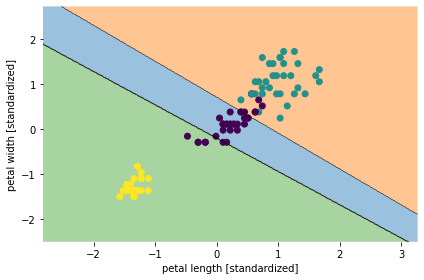

In [641]:
# Fitting our Logistic Regression Method model to the Training set 
# Using very small regularization term
lr = LogisticRegressionMethod(C=100)
lr.fit(standardized_X, y_tr2)
# Plotting against a decision region of 2 features - petal length and petal width
plot_decision_regions(X=np.array(standardized_X),
                      y=y_tr2,
                      clf=lr, 
                      feature_index=[0,3], 
                      filler_feature_values={1: 0, 2: 0})
# using 2 standardized features - 3 and 4 from our X numpy array
plt.scatter(standardized_X[:, 2], standardized_X[:, 3], c=y_tr2)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show

## Let's evaluate the train/test model scores

In [642]:
#the model is underfitting
print(lr.score(standardized_X, y_tr2))
print(lr.score(standardized_X_test, y_test2))

0.88
0.86


## Developing and plotting more complex L2 Regularization 

<ipython-input-640-171682eaea80>:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-640-171682eaea80>:25: RuntimeWarning: overflow encountered in power
  w += (self.eta / m) * err.dot(X) - self.C*sum(np.power(w, 2)) * (self.eta / m)


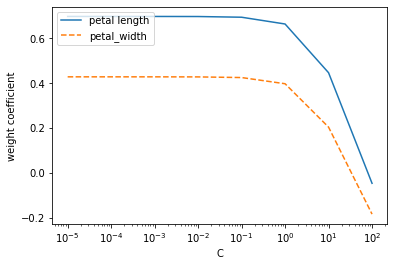

In [643]:
# With regularization. As you increase the cost . 
# feautres diverge over the c - the greater the weight, the greater the regularization coef, 
# which shouldn't be the case. Might be a problem with Log.Reg. implementation.

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegressionMethod(C=10.0**c)
    lr.fit(standardized_X, y_tr2)
    weights.append(lr.coef_)
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
        label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
        label='petal_width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Random Forest Method

### Defining the method

In [644]:
class RandomForestMethod():
    # Defining the parameteres of our forest
    def __init__(self, x, y, trees_num, feat_num, sample_size, depth=10, min_leaf=5):
        np.random.seed(5)
        self.feat_num = feat_num
        self.x, self.y, self.sample_size, self.depth, self.min_leaf  = x, y, sample_size, depth, min_leaf
        # In order to create a specified trees number
        self.trees = [self.create_tree() for i in range(trees_num)]

    def create_tree(self):
        r_indices = np.random.permutation(len(self.y))[:self.sample_size]
        f_r_indices = np.random.permutation(self.x.shape[1])[:self.feat_num]
        # An instance of the DecisionTree class. This part is to make the bagging work.
        # Bagging is used both for features and trees themselves
        return DecisionTree(self.x[r_indices], self.y[r_indices], self.feat_num, f_r_indices,
                    r_indices=np.array(range(self.sample_size)),depth = self.depth, min_leaf=self.min_leaf)
    
    # Common preduction function which is just the average of individual decision trees    
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

### Individual Decision tree class

In [645]:
class DecisionTree():
    #r_indices means the indices of rows
    def __init__(self, x, y, feat_num, f_r_indices,r_indices,depth=10, min_leaf=5):
        self.x, self.y, self.r_indices, self.min_leaf, self.f_r_indices = x, y, r_indices, min_leaf, f_r_indices
        self.depth = depth
        self.feat_num = feat_num
        self.n, self.c = len(r_indices), x.shape[1]
        self.val = np.mean(y[r_indices])
        self.score = float('inf')
        self.brute_split()
    
    # This is used to find an individual split with a brute force.
    def brute_split(self):
        for i in self.f_r_indices: self.best_split(i)
        if self.leaf_node: return
        x = self.column_indxs
        left_side = np.nonzero(x<=self.split)[0]
        right_side = np.nonzero(x>self.split)[0]
        lf_r_indices = np.random.permutation(self.x.shape[1])[:self.feat_num]
        rf_r_indices = np.random.permutation(self.x.shape[1])[:self.feat_num]
        self.left_side = DecisionTree(self.x, self.y, self.feat_num, lf_r_indices, self.r_indices[left_side], depth=self.depth-1, min_leaf=self.min_leaf)
        self.right_side = DecisionTree(self.x, self.y, self.feat_num, rf_r_indices, self.r_indices[right_side], depth=self.depth-1, min_leaf=self.min_leaf)
    
    def best_split(self, v_index):
        x, y = self.x[self.r_indices,v_index], self.y[self.r_indices]
        sort_index = np.argsort(x)
        sort_y,sort_x = y[sort_index], x[sort_index]
        right_side_cnt,right_side_sum,right_side_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        left_side_cnt,left_side_sum,left_side_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            left_side_cnt += 1; right_side_cnt -= 1
            left_side_sum += yi; right_side_sum -= yi
            left_side_sum2 += yi**2; right_side_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            left_side_std = std_agg(left_side_cnt, left_side_sum, left_side_sum2)
            right_side_std = std_agg(right_side_cnt, right_side_sum, right_side_sum2)
            curr_score = left_side_std*left_side_cnt + right_side_std*right_side_cnt
            if curr_score<self.score: 
                self.v_index,self.score,self.split = v_index,curr_score,xi
    
    #calculate standard deviation using math library
    def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)
    
    # property decorator is used
    @property
    def column_indxs(self): return self.x[self.r_indices,self.v_index]

    @property
    # leafs with infinity scores
    def leaf_node(self): return self.score == float('inf') or self.depth <= 0 

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.leaf_node: return self.val
        t = self.left_side if xi[self.v_index]<=self.split else self.right_side
        return t.predict_row(xi)

## Plotting the Forest

<function matplotlib.pyplot.show(close=None, block=None)>

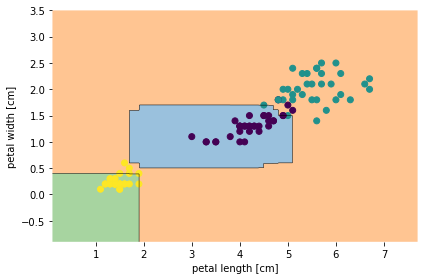

In [692]:
# Defining the parameters of our method's instance
forest = RandomForestMethod(x = X_tr, y=y_tr2, min_leaf=3, trees_num=10, feat_num = 4, sample_size=50)

# Plotting the same features as in logistic regression, changing the previousl used 'lr' t our newly defined random 'forest'
plot_decision_regions(X=X_tr,
                      y=y_tr2,
                      clf=forest, 
                      feature_index=[2,3],
                      filler_feature_values={0: 0, 1: 0})
plt.scatter(X_tr[:, 2], X_tr[:, 3], c=y_tr2)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.tight_layout()
plt.show

## Let's see how our model performs with test data

In [670]:
forest.predict(X_test)

array([0.11252778, 1.98      , 0.99633333, 0.1385754 , 0.1860754 ,
       2.        , 0.        , 0.96125397, 0.16246825, 0.        ,
       0.95692063, 2.        , 2.        , 2.        , 2.        ,
       0.37635317, 1.        , 0.01275   , 0.03308333, 1.        ,
       2.        , 0.80013889, 2.        , 1.        , 0.98833333,
       0.99633333, 0.97138095, 0.98833333, 2.        , 2.        ,
       2.        , 2.        , 0.01891667, 2.        , 2.        ,
       0.89704365, 0.1345754 , 2.        , 2.        , 2.        ,
       0.94873016, 0.29471825, 0.21201984, 2.        , 2.        ,
       0.01675   , 0.46219444, 0.96904762, 0.01891667, 0.98833333])

Defining a very simplified classification function which takes rounds the results to a specific class

In [671]:
def make_classification(pred):
    if pred < 0.75:
        return 0
    elif pred < 1.25:
        return 1
    else:
        return 2

y_pred = [make_classification(pred) for pred in forest.predict(X_test)]
 
# Using the same score function from the logistic regression
def score(y_pred, y):
    return sum(y_pred == y) / len(y)

score(y_pred, np.ravel(y_test))

0.98